In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, precision_recall_curve,confusion_matrix,auc,roc_auc_score,RocCurveDisplay, roc_curve,PrecisionRecallDisplay

import warnings
warnings.filterwarnings('ignore')

### read

In [2]:
df = pd.read_csv('credit_card.txt')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### describe

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Text(0, 0.5, '')

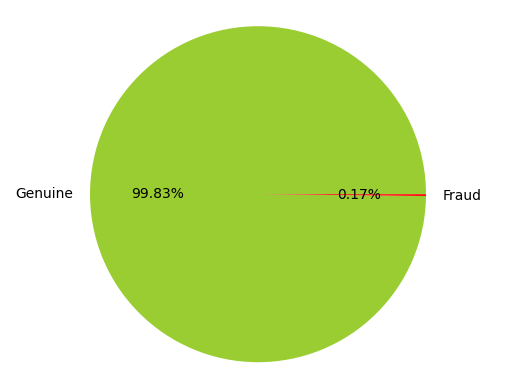

In [6]:
fig, ax = plt.subplots(1, 1)
ax.pie(df.Class.value_counts(),autopct='%1.2f%%', labels=['Genuine','Fraud'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

very unbalanced dataset - 0.17% of fraud

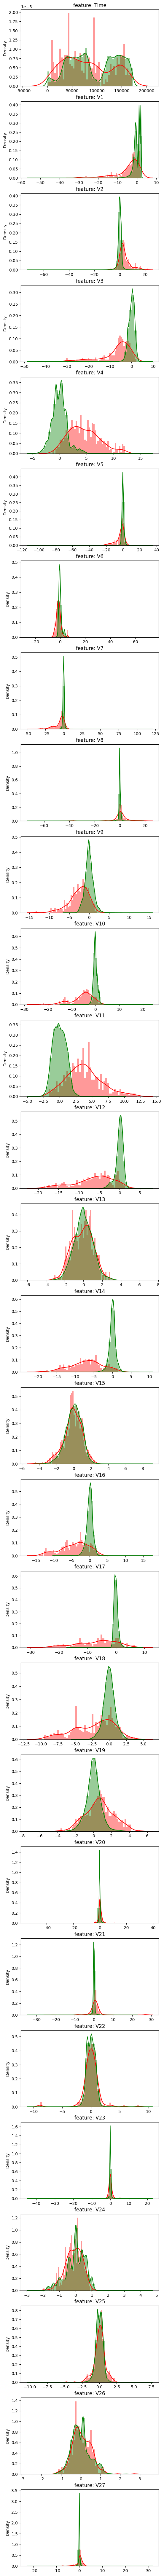

In [7]:
#let us check correlations and shapes of 25 principal components.
# Features V1, V2, ... V28 are the principal components obtained with PCA.
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(df[df.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(df[col][df.Class == 1], bins=50, color='r')
    sns.distplot(df[col][df.Class == 0], bins=50, color='g')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

In [8]:
# drop columns where fraud class almost have no differences from non-fraud
df = df.drop(['V14','V16','V21','V23','V24','V26'],axis=1)

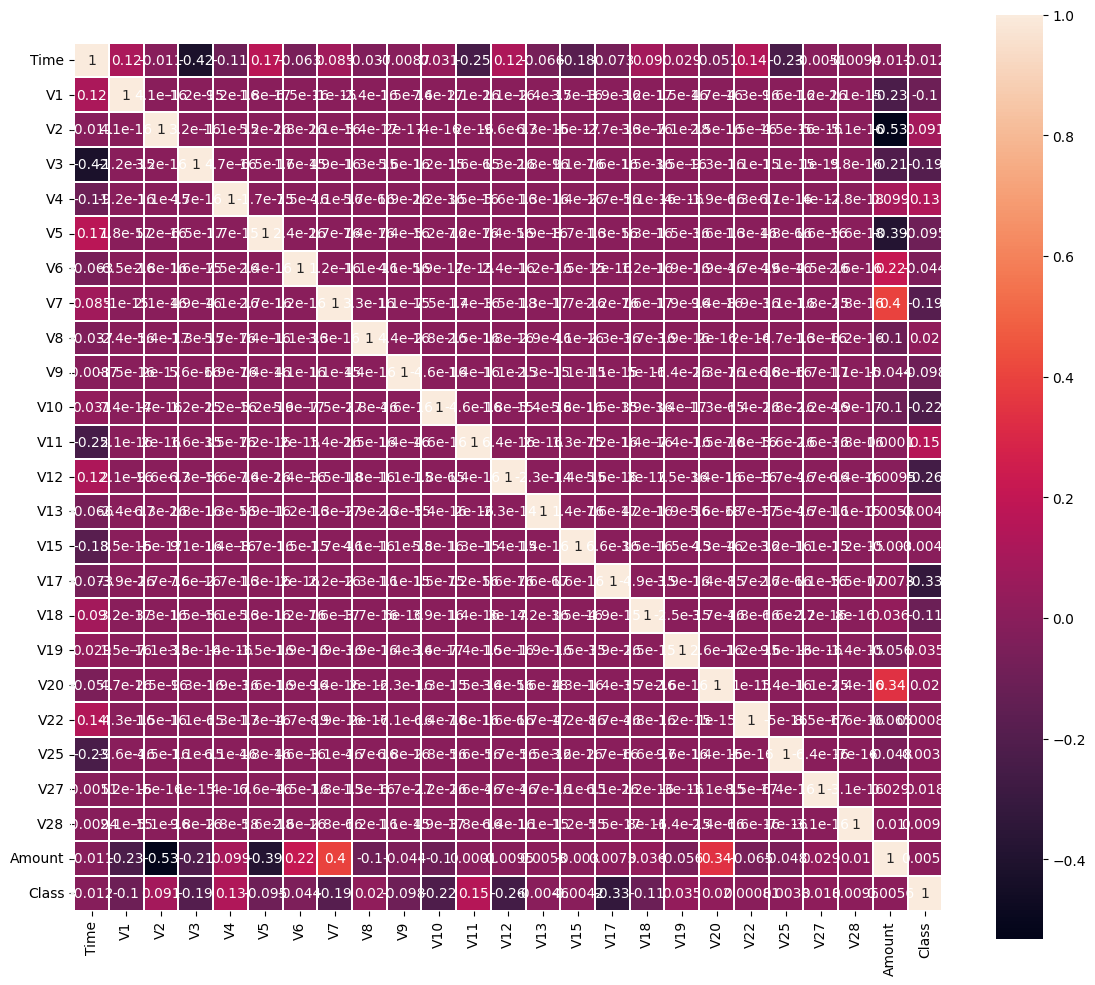

In [9]:
plt.figure(figsize=(14,12))

sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True,linecolor='white', annot=True)
plt.show()

### split dataset into fraud and normal

In [10]:
normal = df[df.Class == 0]
fraud = df[df.Class == 1]

In [11]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V15,V17,V18,V19,V20,V22,V25,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,0.000161,0.011535,0.003887,-0.001178,-0.000644,-0.000024,-0.000072,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,-0.092929,-6.665836,-2.246308,0.680659,0.372319,0.014049,0.041449,0.170575,0.075667,122.211321


### create a sample of normal operations whose length is equal to the length of fraudulent ones

In [14]:
normal_sample = normal.sample(n=len(fraud))

In [15]:
normal_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V17,V18,V19,V20,V22,V25,V27,V28,Amount,Class
271651,164677.0,2.066172,0.092108,-1.886098,0.188152,0.706353,-0.279737,0.069809,-0.056344,0.273067,...,0.048577,0.350347,0.525365,-0.131451,-0.924478,-0.224764,-0.067395,-0.045620,1.79,0
251278,155291.0,-3.022288,-3.087783,0.139342,-0.191225,-3.192981,1.752199,4.573529,-0.158790,-0.267815,...,-0.922958,1.002777,-1.281281,2.621098,0.208145,1.077928,-0.468933,0.150898,1266.00,0
98622,66735.0,1.166003,-0.116642,0.058315,-0.231549,-0.323072,-0.747207,0.150429,-0.110490,-0.128561,...,-0.582321,-0.386313,0.750636,0.056632,-1.578625,-0.059274,-0.110945,0.003969,63.90,0
94847,65056.0,-0.402696,0.602227,1.148348,1.013263,-0.319097,-0.563820,1.174699,-0.166722,-0.629770,...,-0.155880,0.201392,0.380007,0.279184,0.289811,0.206845,0.007724,0.044619,143.73,0
210147,137860.0,2.060905,-0.092004,-1.073017,0.424275,-0.199638,-1.232664,0.146262,-0.303081,0.627681,...,-0.252071,-0.802191,0.146576,-0.261043,-0.744485,-0.319034,-0.074503,-0.061045,1.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219378,141710.0,-2.218795,2.850832,-1.749364,-1.595722,0.571378,-1.864747,1.584125,-0.340131,1.576639,...,-0.396276,-0.561679,-0.510000,1.187599,0.686492,0.171770,1.442052,0.866007,0.77,0
193715,130260.0,0.183041,1.544416,-1.568968,0.136902,2.102732,-0.135194,0.880343,-1.031838,-1.294064,...,2.053073,1.245874,1.123182,0.099720,-0.561942,2.184151,0.015216,0.160597,0.76,0
43790,41654.0,-3.594391,-3.636753,2.141926,1.867719,3.217395,-0.902400,-2.293324,0.738604,0.204432,...,-0.549863,1.047349,0.473438,1.689766,0.553793,0.578105,0.200671,0.235568,185.50,0
120840,75979.0,1.357828,-0.289137,-0.227594,-0.315731,-0.300984,-0.656589,0.050711,-0.314879,-1.257874,...,-0.356629,0.653268,-0.354534,-0.339229,-1.951499,0.229878,-0.039523,0.017877,53.99,0


In [16]:
df_balanced = pd.concat([normal_sample,fraud])
df_balanced = df_balanced.reset_index(drop=True)

In [17]:
df_balanced

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V17,V18,V19,V20,V22,V25,V27,V28,Amount,Class
0,164677.0,2.066172,0.092108,-1.886098,0.188152,0.706353,-0.279737,0.069809,-0.056344,0.273067,...,0.048577,0.350347,0.525365,-0.131451,-0.924478,-0.224764,-0.067395,-0.045620,1.79,0
1,155291.0,-3.022288,-3.087783,0.139342,-0.191225,-3.192981,1.752199,4.573529,-0.158790,-0.267815,...,-0.922958,1.002777,-1.281281,2.621098,0.208145,1.077928,-0.468933,0.150898,1266.00,0
2,66735.0,1.166003,-0.116642,0.058315,-0.231549,-0.323072,-0.747207,0.150429,-0.110490,-0.128561,...,-0.582321,-0.386313,0.750636,0.056632,-1.578625,-0.059274,-0.110945,0.003969,63.90,0
3,65056.0,-0.402696,0.602227,1.148348,1.013263,-0.319097,-0.563820,1.174699,-0.166722,-0.629770,...,-0.155880,0.201392,0.380007,0.279184,0.289811,0.206845,0.007724,0.044619,143.73,0
4,137860.0,2.060905,-0.092004,-1.073017,0.424275,-0.199638,-1.232664,0.146262,-0.303081,0.627681,...,-0.252071,-0.802191,0.146576,-0.261043,-0.744485,-0.319034,-0.074503,-0.061045,1.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,-4.570529,-1.315147,0.391167,1.252967,-0.319189,0.537503,0.292680,0.147968,390.00,1
980,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,-3.267116,-0.688505,0.737657,0.226138,0.028234,0.521875,0.389152,0.186637,0.76,1
981,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,-5.035326,-0.507000,0.266272,0.247968,0.834108,-0.739695,0.385107,0.194361,77.89,1
982,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,-4.614717,-1.478138,-0.035480,0.306271,-0.269209,-0.328168,0.884876,-0.253700,245.00,1


### Splitting into features and targets

In [18]:
def split(df):
    X = df.drop(columns='Class', axis=1)
    Y = df['Class']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
    print(X.shape, X_train.shape, X_test.shape)
    return X_train, X_test, y_train, y_test

In [19]:
X_train, X_test, y_train, y_test = split(df)

(284807, 24) (227845, 24) (56962, 24)


### 1st Model: Naive Bayes Classifier

In [20]:
clf = GaussianNB()
clf.fit(X_train,y_train)

GaussianNB()

In [21]:
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]

In [22]:
def print_metrix(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))
    

In [23]:
def plot_metrics(y_test, y_pred_prob):
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    pr_display = PrecisionRecallDisplay(precision=precision, recall=recall).plot()

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [24]:
print_metrix(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[56502   362]
 [   35    63]]
recall score:  0.6428571428571429
precision score:  0.14823529411764705
f1 score:  0.24091778202676864
accuracy score:  0.9930304413468628
ROC AUC: 0.9678913454802293


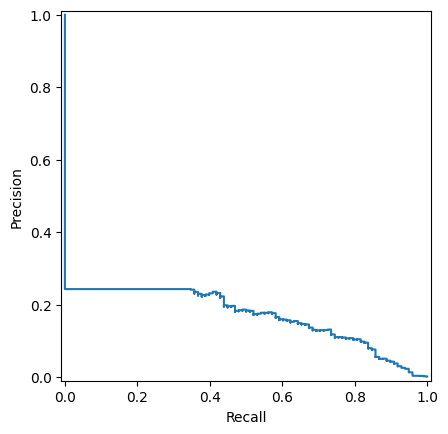

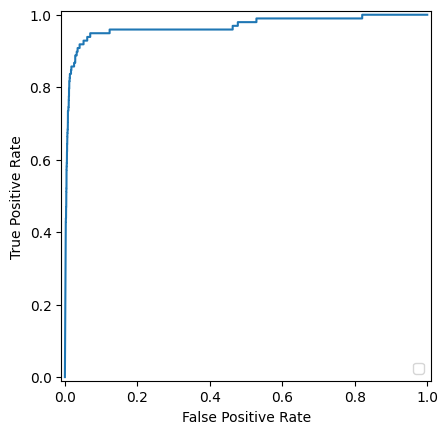

In [25]:
plot_metrics(y_test, y_pred_prob)

In [26]:
#try to use balaced dataset

In [27]:
X_train, X_test, y_train, y_test = split(df_balanced)

(984, 24) (787, 24) (197, 24)


In [28]:
clf.fit(X_train,y_train)

GaussianNB()

In [29]:
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]

In [30]:
print_metrix(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[99  0]
 [31 67]]
recall score:  0.6836734693877551
precision score:  1.0
f1 score:  0.8121212121212121
accuracy score:  0.8426395939086294
ROC AUC: 0.9622758194186765


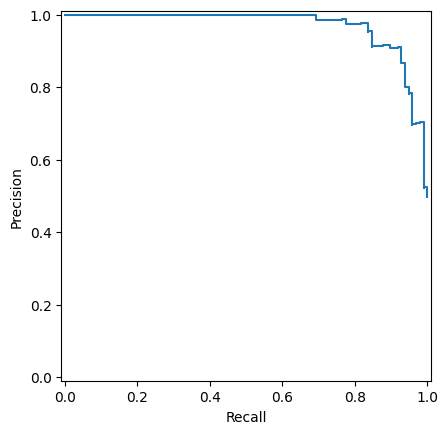

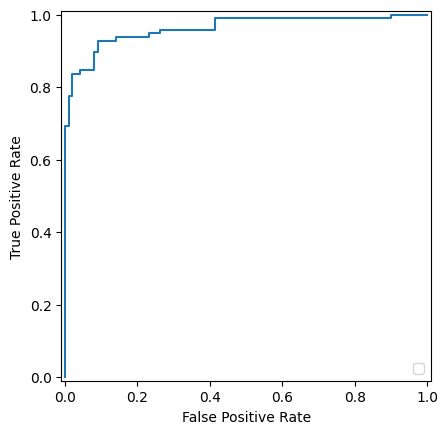

In [31]:
plot_metrics(y_test, y_pred_prob)

### 2nd Model: Logistic Regression

In [32]:
model = LogisticRegression()

In [33]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, y_train)

LogisticRegression()

In [34]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]

In [35]:
print_metrix(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[94  5]
 [ 9 89]]
recall score:  0.9081632653061225
precision score:  0.9468085106382979
f1 score:  0.9270833333333334
accuracy score:  0.9289340101522843
ROC AUC: 0.9754689754689755


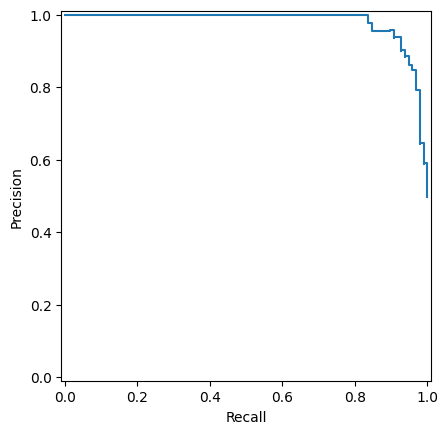

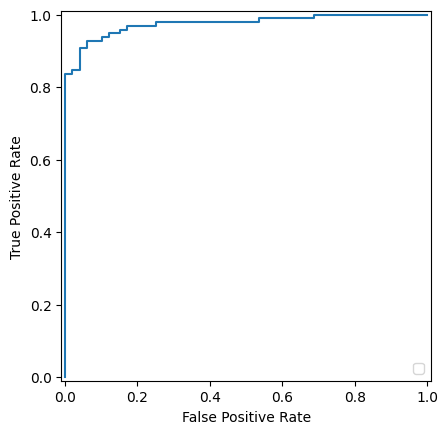

In [36]:
plot_metrics(y_test, y_pred_prob)

### 3rd Model: Random Forest

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
sc = StandardScaler()
df['Amount'] = sc.fit_transform(df[['Amount']])

In [39]:
X_rf = df.drop(columns='Class', axis=1)
y_rf = df['Class']

oversampling for imbalance dataset:

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
sm = SMOTE()

In [42]:
X_oversample, y_oversample = sm.fit_resample(X_rf,y_rf)

In [43]:
y_oversample.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

Splitting into features and targets:

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_oversample, y_oversample, test_size=0.2, stratify=y_oversample, random_state=2)

model:

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf = RandomForestClassifier()

In [47]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:,1]

In [49]:
print_metrix(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[56847    16]
 [    3 56860]]
recall score:  0.9999472416158135
precision score:  0.9997186862648568
f1 score:  0.9998329508787663
accuracy score:  0.9998329317834093
ROC AUC: 0.9999981262761926


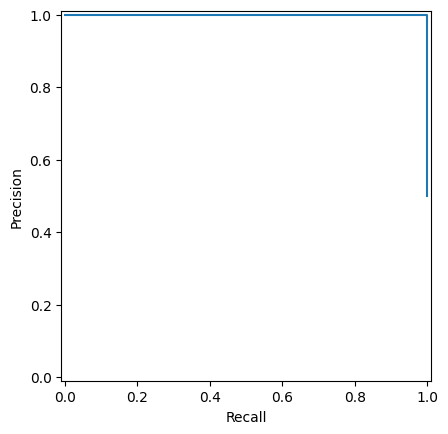

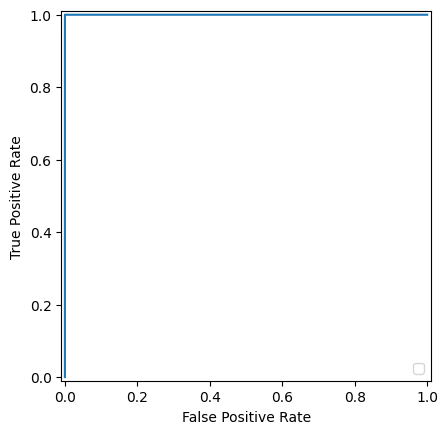

In [50]:
plot_metrics(y_test, y_pred_prob)

In [51]:
rf.feature_importances_

array([0.01004151, 0.01488208, 0.03181199, 0.0973234 , 0.15506929,
       0.00554897, 0.01377618, 0.03763124, 0.00950836, 0.02906831,
       0.18042319, 0.08594188, 0.13685283, 0.00636875, 0.00524642,
       0.11945788, 0.01595179, 0.00693755, 0.00583511, 0.0040851 ,
       0.00473435, 0.01071798, 0.0066687 , 0.00611715])

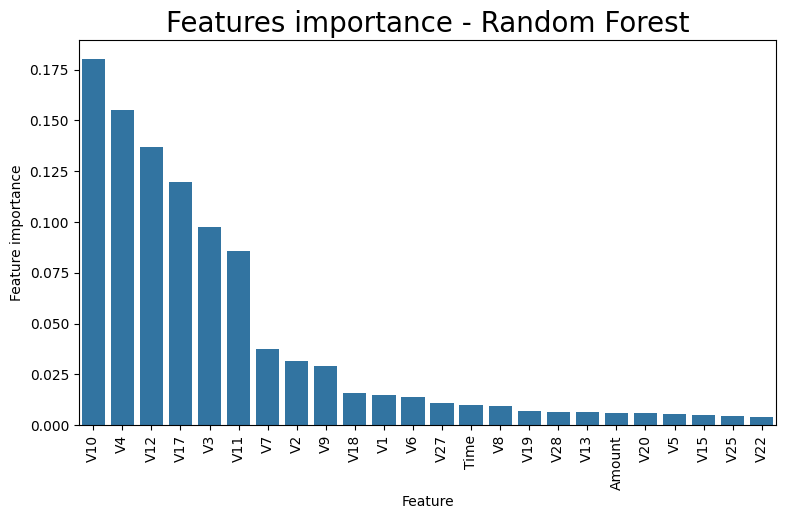

In [52]:
features = df.columns.drop('Class')

plt.figure(figsize = (9,5))

feat_import = pd.DataFrame({'Feature': features, 'Feature importance': rf.feature_importances_})
feat_import = feat_import.sort_values(by='Feature importance',ascending=False)

g = sns.barplot(x='Feature',y='Feature importance',data=feat_import)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title('Features importance - Random Forest',fontsize=20)
plt.show() 

### 4. Boosting
#### AdaBoost

In [53]:
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb

In [54]:
clf = AdaBoostClassifier(random_state=2,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=100)

In [55]:
clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=2)

In [56]:
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]

In [57]:
print_metrix(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[56241   622]
 [ 1452 55411]]
recall score:  0.974464942053708
precision score:  0.9888993985687006
f1 score:  0.9816291099773242
accuracy score:  0.9817631851995147
ROC AUC: 0.9987085332755422


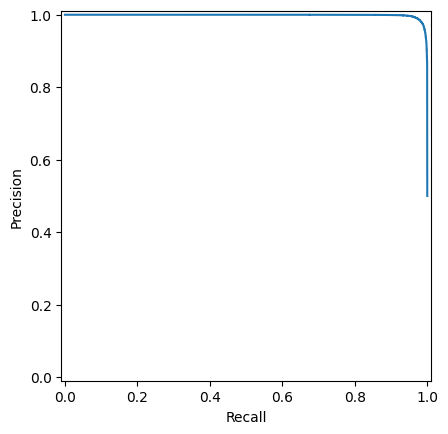

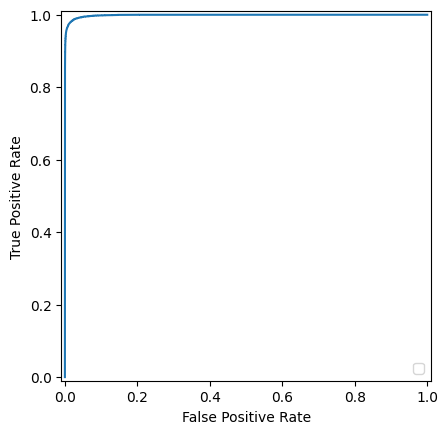

In [58]:
plot_metrics(y_test, y_pred_prob)

In [59]:
clf.feature_importances_

array([0.12, 0.05, 0.03, 0.08, 0.1 , 0.03, 0.04, 0.04, 0.05, 0.02, 0.1 ,
       0.04, 0.06, 0.03, 0.02, 0.02, 0.04, 0.03, 0.02, 0.01, 0.03, 0.02,
       0.01, 0.01])

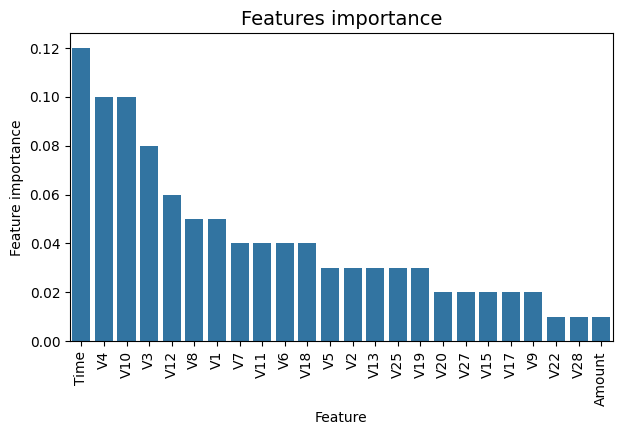

In [60]:
tmp = pd.DataFrame({'Feature': features, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   


#### 4.2 CatBoost

In [61]:
clf = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = 2,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=100)

In [62]:
clf.fit(X_train, y_train)

0:	total: 708ms	remaining: 5m 53s
50:	total: 30.6s	remaining: 4m 29s
100:	total: 59.1s	remaining: 3m 53s
150:	total: 1m 26s	remaining: 3m 19s
200:	total: 1m 58s	remaining: 2m 56s
250:	total: 2m 29s	remaining: 2m 28s
300:	total: 3m 5s	remaining: 2m 2s
350:	total: 3m 43s	remaining: 1m 34s
400:	total: 4m 20s	remaining: 1m 4s
450:	total: 4m 58s	remaining: 32.4s
499:	total: 5m 34s	remaining: 0us


In [63]:
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]

In [64]:
print_metrix(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[56827    36]
 [    0 56863]]
recall score:  1.0
precision score:  0.9993672999525475
f1 score:  0.9996835498672667
accuracy score:  0.9996834496948807
ROC AUC: 0.9999766499715335


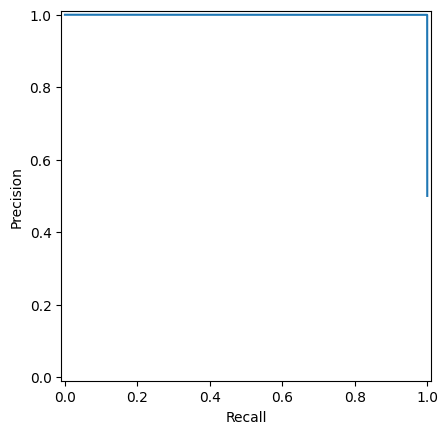

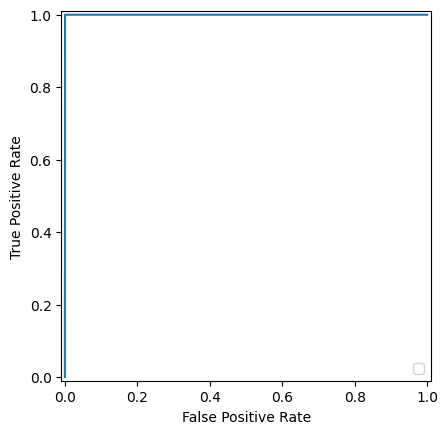

In [65]:
plot_metrics(y_test, y_pred_prob)

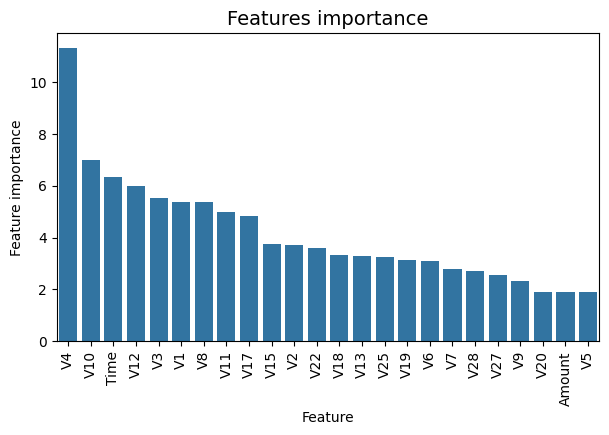

In [66]:
tmp = pd.DataFrame({'Feature': features, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

### CNN

In [67]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization,Dropout,Dense,Flatten,Conv1D
from tensorflow.keras.optimizers import Adam

In [68]:
X_train_arr = np.array(X_train)
y_train_arr = np.array(y_train)
X_test_arr = np.array(X_test)
y_test_arr = np.array(y_test)

In [69]:
model=Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape=(24,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [70]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 23, 32)              │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 23, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 22, 64)              │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 22, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 22, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          90,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,881 (370.63 KB)

 Trainable params: 94,689 (369.88 KB)

 Non-trainable params: 192 (768.00 B)

In [71]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy','precision','recall'])

In [72]:
epochs = 10

In [ ]:
history = model.fit(X_train_arr,y_train_arr,epochs=epochs,validation_data=(X_test,y_test))

Epoch 1/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 116s 8ms/step - accuracy: 0.9547 - loss: 0.1253 - precision: 0.9662 - recall: 0.9421 - val_accuracy: 0.9863 - val_loss: 0.0395 - val_precision: 0.9906 - val_recall: 0.9820
Epoch 2/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 113s 8ms/step - accuracy: 0.9809 - loss: 0.0549 - precision: 0.9855 - recall: 0.9762 - val_accuracy: 0.9906 - val_loss: 0.0271 - val_precision: 0.9933 - val_recall: 0.9878
Epoch 3/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 115s 8ms/step - accuracy: 0.9846 - loss: 0.0439 - precision: 0.9870 - recall: 0.9822 - val_accuracy: 0.9943 - val_loss: 0.0205 - val_precision: 0.9935 - val_recall: 0.9951
Epoch 4/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 118s 8ms/step - accuracy: 0.9871 - loss: 0.0366 - precision: 0.9886 - recall: 0.9856 - val_accuracy: 0.9956 - val_loss: 0.0193 - val_precision: 0.9948 - val_recall: 0.9964
Epoch 5/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 125s 9ms/step - accuracy: 0.9889 - loss: 0.0319 - precision: 0.9896 - recall: 0.9882 - val_a

In [ ]:
def history_plot(metric):
    epochRange = range(1,epochs+1)
    plt.plot(epochRange,history.history[metric])
    plt.plot(epochRange,history.history[f'val_{metric}'])
    plt.title(f'Model {metric}')
    plt.xlabel('Epoch')
    plt.ylabel(f'{metric}')
    plt.legend(['Train','Validation'],loc='upper left')
    plt.show()

In [ ]:
history.history

In [ ]:
history_plot('accuracy')

In [ ]:
history_plot('loss')

In [ ]:
history_plot('precision')

In [ ]:
history_plot('recall')

### Autoencoder

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mae
from tensorflow.keras.metrics import Mean
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# data dimensions // hyperparameters 
input_dim = X_train.shape[1]
BATCH_SIZE = 256
EPOCHS = 100

In [ ]:
INPUT_SHAPE = X_train_scale.shape[1]

In [ ]:
INPUT_SHAPE

In [ ]:
from keras import regularizers
encoding_dim = int(INPUT_SHAPE / 2) - 1
hidden_dim = int(encoding_dim / 2)
learning_rate = 1e-5

input_layer = Input(shape=(INPUT_SHAPE, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation='tanh')(encoder)
decoder = Dense(INPUT_SHAPE, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)


In [ ]:
autoencoder.summary()

In [ ]:
nb_epoch = 100
batch_size = 128

In [ ]:
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

#cp = ModelCheckpoint(filepath="autoencoder_fraud.h5",
#                               save_best_only=True,
#                               verbose=0)


from keras.callbacks import ModelCheckpoint, TensorBoard
tb = TensorBoard(log_dir='./logs',
                histogram_freq=0,
                write_graph=True,
                write_images=True)

history = autoencoder.fit(X_train_scale, X_train_scale,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test_scale, X_test_scale),
                    verbose=1,
                    callbacks=[tb]).history

In [ ]:
from sklearn.preprocessing import Normalizer, MinMaxScaler

In [ ]:
X_train_scale.shape

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss values by Epoch")
plt.show()

In [ ]:
reconstructions = autoencoder.predict(X_test_scale, verbose=0)
reconstruction_error = mae(reconstructions, X_test_scale)

In [ ]:
recons_df = pd.DataFrame({
    'error': reconstruction_error,
    'y_true': y_test
}).reset_index(drop=True)
recons_df

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix
def thresholdTuning(df, iterations):
    
    thresh_df = {
        'threshold': [],
        'accuracy': [],
        'precision': [],
        'recall': []
    }
    
    for i in range(iterations):
        thresh_value = df['error'].quantile(i/iterations)
        preds = df['error'] > thresh_value
        cr = classification_report(df['y_true'], preds, output_dict=True)
        acc = cr['accuracy']
        prec = cr['macro avg']['precision']
        rc = cr['macro avg']['recall']
        
        thresh_df['threshold'].append(thresh_value)
        thresh_df['accuracy'].append(acc)
        thresh_df['precision'].append(prec)
        thresh_df['recall'].append(rc)
        
        print(f"Threshold: {thresh_value:.4f}\tAccuracy: {acc:.3f}\t\tPrecision: {prec:.3f}\tRecall Score: {rc:.3f}")
        
    return pd.DataFrame(thresh_df)
        
thresh_df = thresholdTuning(recons_df, 10)